# **ONLINE STORE A/B TESTING**

# Describing project

In this project I will research the effects of adding a new product recommendation system to an online store using an A/B test.

The data is compiled from:
- Data on the users who signed up to the store during the experiment.
- Data on users who participated in experiments, their experiment and their group.
- Events experienced by the test users in the online store in a time period that includes the experiment.
- The marketing events in the year of the experiment.

The end goal is to decide whether to integrate the new product recommendation system into the online store based on the results of the A/B test.

The main steps of the project will be:
- Loading the data.
- Preparing the data for analysis by discovering and treating issues.
- Performing exploratory data analysis.
- Evaluating the results of the A/B test.
- Drawing conclusions based on the EDA stage and the evaluation of the A/B test results.

# Importing modules

In [ ]:
# Importing the required modules
# Mathematical modules
import pandas as pd
import numpy as np
import math as mth
from scipy import stats as st

# Plotting modules
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# Extending the shown fields of the dataframes
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

# Loading data

## Setting paths

In [ ]:
# Selecting the type of runtime and loading the data file
# Three types of runtimes are supported:
# 1 - A local runtime.
# 2 - A hosted runtime on Yandex Jupyterhub.
# 3 - A hosted runtime on Google colaboratory.
runtime_type = 2

# To connect to a local runtime use the command:
# jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0

# Setting file paths
file_path_local = 'C:/Google Drive/Colab Notebooks/Notebooks - Yandex Practicum/'
file_path_yandex = '/datasets/'
file_path_google_colab = '/content/drive/My Drive/Colab Notebooks/Notebooks - Yandex Practicum/'

# Loading the data
if runtime_type == 1:
    print('A local runtime was chosen.\n')
    file_path = file_path_local

elif runtime_type == 2:
    print('A hosted runtime on Yandex Jupyterhub was chosen.\n')
    file_path = file_path_yandex
    
elif runtime_type == 3:
    print('A hosted runtime on Google colaboratory was chosen.\n')
    from google.colab import drive # For integration of files with Google drive
    drive.mount('/content/drive') # Mounting Google drive
    file_path = file_path_google_colab

else:
    print('Incorrect selection of a runtime type! Please set "runtime_type" to either 1, 2 or 3.')

A hosted runtime on Yandex Jupyterhub was chosen.



## Loading data

In [ ]:
# Loading the data
data_final_ab_new_users_upd = pd.read_csv(file_path + 'final_ab_new_users_upd_us.csv')
data_final_ab_participants_upd = pd.read_csv(file_path + 'final_ab_participants_upd_us.csv')
data_final_ab_events_upd = pd.read_csv(file_path + 'final_ab_events_upd_us.csv')
data_ab_project_marketing_events = pd.read_csv(file_path + 'ab_project_marketing_events_us.csv')

## Exploring data generally

### New users

In [ ]:
# Exploring the general information of "data_final_ab_new_users_upd"
print('Printing the general information for "data_final_ab_new_users_upd":\n')
print(data_final_ab_new_users_upd.info())
print()

print('Printing some of the first rows:\n')
display(data_final_ab_new_users_upd.head(5))

Printing the general information for "data_final_ab_new_users_upd":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
None

Printing some of the first rows:



,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [ ]:
# Generally exploring the columns of "data_final_ab_new_users_upd"
print('The "data_final_ab_new_users_upd" dataframe contains {} unique users.'
    .format(data_final_ab_new_users_upd['user_id'].nunique()))

print('The minimal and maximal joining dates are',
      pd.to_datetime(data_final_ab_new_users_upd['first_date'], format='%Y-%m-%d').dt.date.min(),
      'and',
      pd.to_datetime(data_final_ab_new_users_upd['first_date'], format='%Y-%m-%d').dt.date.max(),
      '.')

print('The unique regions are {}.'
    .format( ', '.join(list(data_final_ab_new_users_upd['region'].unique())) ))

print('The unique devices are {}.'
    .format( ', '.join(list(data_final_ab_new_users_upd['device'].unique())) ))

The "data_final_ab_new_users_upd" dataframe contains 58703 unique users.
The minimal and maximal joining dates are 2020-12-07 and 2020-12-23 .
The unique regions are EU, N.America, APAC, CIS.
The unique devices are PC, Android, iPhone, Mac.


### User groups

In [ ]:
# Exploring the general information of "data_final_ab_participants_upd"
print('Printing the general information for "data_final_ab_participants_upd":\n')
print(data_final_ab_participants_upd.info())
print()

print('Printing some of the first rows:\n')
display(data_final_ab_participants_upd.head(5))

Printing the general information for "data_final_ab_participants_upd":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB
None

Printing some of the first rows:



,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [ ]:
# Generally exploring the columns of "data_final_ab_participants_upd"
print('The "data_final_ab_participants_upd" dataframe contains {} unique users.'
    .format(data_final_ab_participants_upd['user_id'].nunique()))
print('The unique groups are {}.'
    .format( ', '.join(list(data_final_ab_participants_upd['group'].unique())) ))
print('The unique experiments are {}.'
    .format( ', '.join(list(data_final_ab_participants_upd['ab_test'].unique())) ))

The "data_final_ab_participants_upd" dataframe contains 13638 unique users.
The unique groups are A, B.
The unique experiments are recommender_system_test, interface_eu_test.


### User events

In [ ]:
# Exploring the general information of "data_final_ab_events_upd"
print('Printing the general information for "data_final_ab_events_upd":\n')
print(data_final_ab_events_upd.info())
print()

print('Printing some of the first rows:\n')
display(data_final_ab_events_upd.head(5))

Printing the general information for "data_final_ab_events_upd":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB
None

Printing some of the first rows:



,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [ ]:
# Generally exploring the columns of "data_final_ab_events_upd"
print('The "data_final_ab_events_upd" dataframe contains {} unique users.'
    .format(data_final_ab_events_upd['user_id'].nunique()))

print('The minimal and maximal event dates are',
      pd.to_datetime(data_final_ab_events_upd['event_dt'], format='%Y-%m-%d').dt.date.min(),
      'and',
      pd.to_datetime(data_final_ab_events_upd['event_dt'], format='%Y-%m-%d').dt.date.max(),
      '.')

unique_events = data_final_ab_events_upd['event_name'].unique()
print('The unique events are {}.\n'
    .format( ', '.join(list(unique_events)) ))

print('The different types of events and their amount of records are:\n',
      data_final_ab_events_upd['event_name'].value_counts())

The "data_final_ab_events_upd" dataframe contains 58703 unique users.
The minimal and maximal event dates are 2020-12-07 and 2020-12-30 .
The unique events are purchase, product_cart, product_page, login.

The different types of events and their amount of records are:
 login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: event_name, dtype: int64


### Marketing events

In [ ]:
# Exploring the general information of "data_ab_project_marketing_events"
print('Printing the general information for "data_ab_project_marketing_events":\n')
print(data_ab_project_marketing_events.info())
print()

print('Printing some of the first rows:\n')
display(data_ab_project_marketing_events)

Printing the general information for "data_ab_project_marketing_events":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
None

Printing some of the first rows:



,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [ ]:
# Generally exploring the marketing events
print('The unique marketing events are {}.\n'
    .format( ', '.join(list(data_ab_project_marketing_events['name'].unique())) ))

The unique marketing events are Christmas&New Year Promo, St. Valentine's Day Giveaway, St. Patric's Day Promo, Easter Promo, 4th of July Promo, Black Friday Ads Campaign, Chinese New Year Promo, Labor day (May 1st) Ads Campaign, International Women's Day Promo, Victory Day CIS (May 9th) Event, CIS New Year Gift Lottery, Dragon Boat Festival Giveaway, Single's Day Gift Promo, Chinese Moon Festival.



## Conclusions

We have learned the following about the data:
- The "data_final_ab_new_users_upd" dataframe contains 58703 unique users.
- The minimal and maximal joining dates are 2020-12-07 and 2020-12-23.
- The unique regions are EU, N.America, APAC, CIS.
- The unique devices are PC, Android, iPhone, Mac.
---
- The "data_final_ab_participants_upd" dataframe contains 13638 unique users.
- The unique groups are A, B.
- The unique experiments are recommender_system_test, interface_eu_test.
---
- The "data_final_ab_participants_upd" dataframe contains 58703 unique users.
- The minimal and maximal event dates are 2020-12-07 and 2020-12-30.
- The unique events are purchase, product_cart, product_page, login.
---
- The unique marketing events in "data_ab_project_marketing_events" are Christmas&New Year Promo, St. Valentine's Day Giveaway, St. Patric's Day Promo, Easter Promo, 4th of July Promo, Black Friday Ads Campaign, Chinese New Year Promo, Labor day (May 1st) Ads Campaign, International Women's Day Promo, Victory Day CIS (May 9th) Event, CIS New Year Gift Lottery, Dragon Boat Festival Giveaway, Single's Day Gift Promo, Chinese Moon Festival.

The following issues were found in the data:
- The data types of the columns with dates and times should be converted to the datetime type, and the types of the other variables are correct.
- The only variable which contains missing values is the "details" column in the "data_final_ab_events_upd" table. It has about 85% of its values missing, which will be investigated.

# Preparing data

## Treating data types

In [ ]:
# Converting dates to datetime
data_ab_project_marketing_events['start_dt'] = pd.to_datetime(data_ab_project_marketing_events['start_dt'], format='%Y-%m-%d')
data_ab_project_marketing_events['finish_dt'] = pd.to_datetime(data_ab_project_marketing_events['finish_dt'], format='%Y-%m-%d')

data_final_ab_new_users_upd['first_date'] = pd.to_datetime(data_final_ab_new_users_upd['first_date'], format='%Y-%m-%d')

data_final_ab_events_upd['event_dt'] = pd.to_datetime(data_final_ab_events_upd['event_dt'], format='%Y-%m-%d %H:%M:%S')

# Presenting the data types
data_ab_project_marketing_events.info()
print('\n')
data_final_ab_new_users_upd.info()
print('\n')
data_final_ab_events_upd.info()
print('\n')
data_final_ab_participants_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (t

## Treating missing values

In [ ]:
# Calculating the percentage of missing values per column
print('The percentages of missing values per column in data_ab_project_marketing_events are:\n')
print(100 * data_ab_project_marketing_events.isna().sum() / len(data_ab_project_marketing_events), '\n')

print('The percentages of missing values per column in data_final_ab_new_users_upd are:\n')
print(100 * data_final_ab_new_users_upd.isna().sum() / len(data_final_ab_new_users_upd), '\n')

print('The percentages of missing values per column in data_final_ab_events_upd are:\n')
print(100 * data_final_ab_events_upd.isna().sum() / len(data_final_ab_events_upd), '\n')

print('The percentages of missing values per column in data_final_ab_participants_upd are:\n')
print(100 * data_final_ab_participants_upd.isna().sum() / len(data_final_ab_participants_upd))

The percentages of missing values per column in data_ab_project_marketing_events are:

name         0.0
regions      0.0
start_dt     0.0
finish_dt    0.0
dtype: float64 

The percentages of missing values per column in data_final_ab_new_users_upd are:

user_id       0.0
first_date    0.0
region        0.0
device        0.0
dtype: float64 

The percentages of missing values per column in data_final_ab_events_upd are:

user_id        0.000000
event_dt       0.000000
event_name     0.000000
details       85.766977
dtype: float64 

The percentages of missing values per column in data_final_ab_participants_upd are:

user_id    0.0
group      0.0
ab_test    0.0
dtype: float64


In [ ]:
# Investigating the missing values in data_final_ab_events_upd
print('The unique events in data_final_ab_events_upd are:\n',
    data_final_ab_events_upd['event_name'].value_counts(), '\n')

print('The number of rows is', len(data_final_ab_events_upd))
print('The number of missing values in the "details" column is',
      data_final_ab_events_upd['details'].isna().sum())
print('The number of non-missing values in the "details" column is {}'
      .format(len(data_final_ab_events_upd) - data_final_ab_events_upd['details'].isna().sum()), '\n')

print('The number of missing values in the "details" column when the event is "purchase" is',
     data_final_ab_events_upd.query('event_name == "purchase"')['details'].isna().sum())
print('The number of missing values in the "details" column when the event is not "purchase" is',
     data_final_ab_events_upd.query('event_name != "purchase"')['details'].isna().sum())

The unique events in data_final_ab_events_upd are:
 login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: event_name, dtype: int64 

The number of rows is 423761
The number of missing values in the "details" column is 363447
The number of non-missing values in the "details" column is 60314 

The number of missing values in the "details" column when the event is "purchase" is 0
The number of missing values in the "details" column when the event is not "purchase" is 363447


The missing values in the "details" columns aren't really missing - this column only has values when the event is "purchase", in which case these values describe the purchase price. This can be understood from seeing that the number of values in the "details" column is equal to the number of "purchase" events, and from seeing that these values correspond to each other.

## Treating duplicates

In [ ]:
# Looking for duplicated rows
num_rows = len(data_ab_project_marketing_events)
num_duplicated = data_ab_project_marketing_events.duplicated().sum()
print('The total number of rows in data_ab_project_marketing_events is {}.'.format(num_rows))
print('The total number of duplicated rows in data_ab_project_marketing_events is {} ({:.2f}%).\n'
      .format(num_duplicated, 100*num_duplicated/num_rows))

num_rows = len(data_final_ab_new_users_upd)
num_duplicated = data_final_ab_new_users_upd.duplicated().sum()
print('The total number of rows in data_final_ab_new_users_upd is {}.'.format(num_rows))
print('The total number of duplicated rows in data_final_ab_new_users_upd is {} ({:.2f}%).\n'
      .format(num_duplicated, 100*num_duplicated/num_rows))

num_rows = len(data_final_ab_events_upd)
num_duplicated = data_final_ab_events_upd.duplicated().sum()
print('The total number of rows in data_final_ab_events_upd is {}.'.format(num_rows))
print('The total number of duplicated rows in data_final_ab_events_upd is {} ({:.2f}%).\n'
      .format(num_duplicated, 100*num_duplicated/num_rows))

num_rows = len(data_final_ab_participants_upd)
num_duplicated = data_final_ab_participants_upd.duplicated().sum()
print('The total number of rows in data_final_ab_participants_upd is {}.'.format(num_rows))
print('The total number of duplicated rows in data_final_ab_participants_upd is {} ({:.2f}%).\n'
      .format(num_duplicated, 100*num_duplicated/num_rows))

The total number of rows in data_ab_project_marketing_events is 14.
The total number of duplicated rows in data_ab_project_marketing_events is 0 (0.00%).

The total number of rows in data_final_ab_new_users_upd is 58703.
The total number of duplicated rows in data_final_ab_new_users_upd is 0 (0.00%).

The total number of rows in data_final_ab_events_upd is 423761.
The total number of duplicated rows in data_final_ab_events_upd is 0 (0.00%).

The total number of rows in data_final_ab_participants_upd is 14525.
The total number of duplicated rows in data_final_ab_participants_upd is 0 (0.00%).



## Treating incorrect values

In [ ]:
# Finding users whose number of logins is lower than their number of non-login events
# Such users will cause problems when calculating conversions,
# and especially users with 0 logins, which will cause division by 0
data_users_events_aggregated = \
    pd.pivot_table(data=data_final_ab_events_upd.reset_index() \
                                             [['user_id','event_name','index']],
                   index='user_id',
                   columns='event_name',
                   values='index', # Selected just so we'll have something to count
                   aggfunc='nunique',
                   fill_value=0) \
        .reset_index().rename_axis(None, axis=1)

print('Presenting the "data_users_events_aggregated" dataframe:\n',
      data_users_events_aggregated.head(5), '\n')

bad_users_data = data_users_events_aggregated \
    .query('login < product_page or login < product_cart or login < purchase')
bad_users = bad_users_data['user_id'].unique()
print('Presenting the "bad_users_data" dataframe:\n',
      bad_users_data.head(5), '\n')
print('There are {} users whose number of logins is lower than their number of non-login events.'
      .format(len(bad_users)))

Presenting the "data_users_events_aggregated" dataframe:
             user_id  login  product_cart  product_page  purchase
0  0001710F4DDB1D1B      2             2             2         0
1  000199F1887AE5E6      4             4             4         4
2  0002499E372175C7      3             0             3         3
3  0002CE61FF2C4011      4             4             4         0
4  000456437D0EFFE1      2             0             2         0 

Presenting the "bad_users_data" dataframe:
                user_id  login  product_cart  product_page  purchase
1020  0467C438FB05FFCB      5             0             5         6
1690  076475032FFF8220      2             0             0         4
2210  0997EC1C4850B27B      3             0             0         4
2228  09B67269EB574925      3             3             3         4
2428  0A9761F64B66289F      3             0             3         4 

There are 155 users whose number of logins is lower than their number of non-login events.


## Conclusions

- The data types of the columns with dates and times were converted to the datetime type, and the types of the other variables were correct.
- The only variable which contained missing values was the "details" column in the "data_final_ab_events_upd" table. It had about 85% of its values missing, but these values aren't really missing - this column only has values when the event is "purchase", in which case these values describe the purchase price.
- The data didn't contain duplicated rows.
- There are 10 users whose number of logins is lower than their number of non-login events.

# Exploring data

## Preparing test data

### Filtering test data

Filtering the data required for the A/B test.

In [ ]:
# Creating a dataframe of the users in the A/B test, their information and their events

# Adding the test groups of the users to the events dataframe
data_ab_test = data_final_ab_events_upd.merge(right=data_final_ab_participants_upd,
                                              how='left',
                                              left_on='user_id',
                                              right_on='user_id')

# Adding extra information about the users to the events dataframe
data_ab_test = data_ab_test.merge(right=data_final_ab_new_users_upd,
                                  how='left',
                                  left_on='user_id',
                                  right_on='user_id')

# Removing the time from the datetime variable
data_ab_test['event_dt'] = data_ab_test['event_dt'].dt.date

# Adding the last day in the test for each customer, which is the 14th day since joining
# The last day is defined as inclusive - the customer still participated in it - so "13" is added
data_ab_test['last_date'] = data_ab_test['first_date'] + pd.to_timedelta(13, unit="D")

# Presenting the resulting data
print('Presenting the "data_ab_test" dataframe:\n')
print(data_ab_test.info(), '\n')
print(data_ab_test.head(5))

Presenting the "data_ab_test" dataframe:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429476 entries, 0 to 429475
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     429476 non-null  object        
 1   event_dt    429476 non-null  object        
 2   event_name  429476 non-null  object        
 3   details     61134 non-null   float64       
 4   group       102838 non-null  object        
 5   ab_test     102838 non-null  object        
 6   first_date  429476 non-null  datetime64[ns]
 7   region      429476 non-null  object        
 8   device      429476 non-null  object        
 9   last_date   429476 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 36.0+ MB
None 

            user_id    event_dt event_name  details group            ab_test first_date     region   device  last_date
0  E1BDDCE0DAFA2679  2020-12-07   purchase    99.99   NaN    

In [ ]:
# Filtering the data

# Keeping the data of the A/B test relevant to us
data_ab_test = data_ab_test.query('ab_test == "recommender_system_test"').reset_index(drop=True)

# Keeping the users who belong to the EU region
data_ab_test = data_ab_test.query('region == "EU"').reset_index(drop=True)

# Keeping the users who joined in the time period of the A/B test
data_ab_test = \
    data_ab_test.query('"2020-12-07" <= first_date and first_date <= "2020-12-21"').reset_index(drop=True)

# Keeping only the first 14 days of events since each user signed up
data_ab_test = \
    data_ab_test.query('event_dt <= last_date').reset_index(drop=True)

# Removing users whose number of logins is lower than their number of non-login events
# Such users will cause problems when calculating conversions,
# and especially users with 0 logins, which will cause division by 0
data_ab_test = data_ab_test.query('user_id not in @bad_users')

# Presenting the resulting data
print('Presenting the "data_ab_test" dataframe:\n')
print(data_ab_test.info(), '\n')
print(data_ab_test.head(5))

Presenting the "data_ab_test" dataframe:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21884 entries, 0 to 21951
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     21884 non-null  object        
 1   event_dt    21884 non-null  object        
 2   event_name  21884 non-null  object        
 3   details     2968 non-null   float64       
 4   group       21884 non-null  object        
 5   ab_test     21884 non-null  object        
 6   first_date  21884 non-null  datetime64[ns]
 7   region      21884 non-null  object        
 8   device      21884 non-null  object        
 9   last_date   21884 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 1.8+ MB
None 

            user_id    event_dt event_name  details group                  ab_test first_date region   device  last_date
0  831887FE7F2D6CBA  2020-12-07   purchase     4.99     A  recommender_sys

In [ ]:
# Finding the users in each testing group
users_group_A = data_ab_test.query('group == "A"')['user_id'].unique()
users_group_B = data_ab_test.query('group == "B"')['user_id'].unique()

# Calculating the number of users in the A/B test
num_users_ab_test = data_ab_test['user_id'].nunique()

# Presenting the resulting data
print('There are {} events in the A/B test.'.format(len(data_ab_test)))
print('There are {} users in the A/B test.'.format(num_users_ab_test))
print('There are {} users in group A and {} in group B.\n'
      .format(len(users_group_A), len(users_group_B)))

There are 21884 events in the A/B test.
There are 3471 users in the A/B test.
There are 2603 users in group A and 868 in group B.



### Checking test data

Checking whether the data fits the technical description of the A/B test.

In [ ]:
# Checking if any participant of the "recommender_system_test" test also participated
# in the "interface_eu_test" test at the same time

# Finding the users who participated in each test
users_recommender_system_test = \
    data_final_ab_participants_upd.query('ab_test == "recommender_system_test"') \
        ['user_id'].unique()
users_interface_eu_test = \
    data_final_ab_participants_upd.query('ab_test == "interface_eu_test"') \
        ['user_id'].unique()

# Finding the users who enter both tests
intersection_users = [x for x in users_recommender_system_test if x in users_interface_eu_test]
print('The number of users that appear in both A/B tests is {}.'.format( len(intersection_users)))
print('There are {} users in the A/B test.'.format(num_users_ab_test))
print('There are {} users in group A and {} in group B.'
    .format(len(users_group_A), len(users_group_B)))
print('The numbers of users who entered both A/B tests in the test groups are:')
print(data_ab_test[['user_id','group']].drop_duplicates() \
               .query('user_id in @intersection_users')['group'].value_counts())

The number of users that appear in both A/B tests is 887.
There are 3471 users in the A/B test.
There are 2603 users in group A and 868 in group B.
The numbers of users who entered both A/B tests in the test groups are:
A    664
B    219
Name: group, dtype: int64


In [ ]:
# Checking if the minimal and maximal event dates fit the A/B test's launch and end dates
print('The A/B test took place between 2020-12-07 and 2020-01-01.')
print('The minimal and maximal event dates are',
      pd.to_datetime(data_final_ab_events_upd['event_dt'], format='%Y-%m-%d').dt.date.min(),
      'and',
      pd.to_datetime(data_final_ab_events_upd['event_dt'], format='%Y-%m-%d').dt.date.max(),
      '.')

The A/B test took place between 2020-12-07 and 2020-01-01.
The minimal and maximal event dates are 2020-12-07 and 2020-12-30 .


In [ ]:
# Checking if the experiment audience is 15% of the new users from the EU region

# Calculating the number of new users from the EU region
num_users_eu = data_final_ab_new_users_upd.query('region == "EU"')['user_id'].nunique()
print('The number of new users from the EU region is {}, and 15% of these is {}.'
    .format(num_users_eu, 0.15*num_users_eu))
print('The number of users in the A/B test is {}.'.format(num_users_ab_test))

The number of new users from the EU region is 43396, and 15% of these is 6509.4.
The number of users in the A/B test is 3471.


In [ ]:
# Checking if the users of both groups use the same devices, and thus the same version of the online store
print('The devices used by group A\'s users and their percentages among the users are:\n',
      data_ab_test.query('group == "A"')['device'].value_counts(normalize=True)*100, '\n')
print('The devices used by group B\'s users and their percentages among the users are:\n',
      data_ab_test.query('group == "B"')['device'].value_counts(normalize=True)*100)

The devices used by group A's users and their percentages among the users are:
 Android    43.149094
PC         26.306317
iPhone     20.337901
Mac        10.206688
Name: device, dtype: float64 

The devices used by group B's users and their percentages among the users are:
 Android    46.244635
PC         23.283262
iPhone     22.339056
Mac         8.133047
Name: device, dtype: float64


The percentages of users who signed up with each type of device are indeed very close.

In [ ]:
# Checking if there were special events during the duration of the experiment
print('The A/B test took place between 2020-12-07 and 2020-01-01.')
print('The marketing events sorted by starting date are:\n')
display(data_ab_project_marketing_events.sort_values('start_dt'))

The A/B test took place between 2020-12-07 and 2020-01-01.
The marketing events sorted by starting date are:



,name,regions,start_dt,finish_dt
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11
11,Dragon Boat Festival Giveaway,APAC,2020-06-25,2020-07-01
4,4th of July Promo,N.America,2020-07-04,2020-07-11
13,Chinese Moon Festival,APAC,2020-10-01,2020-10-07


The "Christmas & New Year Promo" marketing event occured in the EU region during the experiment, between the 2020-12-25 and 2021-01-03.

## Conversion

Studying conversion at different funnel stages.

### Studying funnel generally

In [ ]:
# Studying the event funnel per test group and checking if all events are necessary
print('The different types of events and their amount of records for group A are:\n',
      data_ab_test.query('group == "A"')['event_name'].value_counts())
print()
print('The different types of events and their amount of records for group B are:\n',
      data_ab_test.query('group == "B"')['event_name'].value_counts())

The different types of events and their amount of records for group A are:
 login           7642
product_page    4907
purchase        2383
product_cart    2292
Name: event_name, dtype: int64

The different types of events and their amount of records for group B are:
 login           2257
product_page    1215
product_cart     603
purchase         585
Name: event_name, dtype: int64


- We see that the number of "product_cart" and "purchase" events are very close.
- We see that the number of "product_cart" events can be smaller than the number of "purchase" events, which teaches that it is possible to make purchases without going into the product cart, thus we have optional events in the funnel.
- Having optional events suggests that we may want to study the absolute conversion into each stage (conversion from the "login" event to the other events).
- There is no way to know from the data whether a customer made a purchase after entering the product cart or without doing so.
- This suggests that we may want to disregard the "product_cart" event in the analysis.

### Conversion by unique users

In [ ]:
# Collecting data per test group per user per event
data_A_users_events_aggregated = \
    pd.pivot_table(data=data_ab_test.query('group == "A"').reset_index() \
                                             [['user_id','event_name','index']],
                   index='user_id',
                   columns='event_name',
                   values='index', # Selected just so we'll have something to count
                   aggfunc='nunique',
                   fill_value=0) \
        .reset_index().rename_axis(None, axis=1)

print('Presenting the "data_A_users_events_aggregated" dataframe:\n',
      data_A_users_events_aggregated.head(5), '\n')

data_B_users_events_aggregated = \
    pd.pivot_table(data=data_ab_test.query('group == "B"').reset_index() \
                                             [['user_id','event_name','index']],
                   index='user_id',
                   columns='event_name',
                   values='index', # Selected just so we'll have something to count
                   aggfunc='nunique',
                   fill_value=0) \
        .reset_index().rename_axis(None, axis=1)

print('Presenting the "data_A_users_events_aggregated" dataframe:\n',
      data_A_users_events_aggregated.head(5), '\n')
    
print('Presenting the "data_B_users_events_aggregated" dataframe:\n',
      data_B_users_events_aggregated.head(5), '\n')

# Calculating the conversions
data_A_users_events_aggregated['conversion_of_login_to_product'] = \
    data_A_users_events_aggregated['product_page'] / data_A_users_events_aggregated['login']
data_A_users_events_aggregated['conversion_of_login_to_cart'] = \
    data_A_users_events_aggregated['product_cart'] / data_A_users_events_aggregated['login']
data_A_users_events_aggregated['conversion_of_login_to_purchase'] = \
    data_A_users_events_aggregated['purchase'] / data_A_users_events_aggregated['login']

print('Presenting the "data_A_users_events_aggregated" dataframe:\n',
      data_A_users_events_aggregated.head(5), '\n')

data_B_users_events_aggregated['conversion_of_login_to_product'] = \
    data_B_users_events_aggregated['product_page'] / data_B_users_events_aggregated['login']
data_B_users_events_aggregated['conversion_of_login_to_cart'] = \
    data_B_users_events_aggregated['product_cart'] / data_B_users_events_aggregated['login']
data_B_users_events_aggregated['conversion_of_login_to_purchase'] = \
    data_B_users_events_aggregated['purchase'] / data_B_users_events_aggregated['login']

print('Presenting the "data_B_users_events_aggregated" dataframe:\n',
      data_B_users_events_aggregated.head(5), '\n')

Presenting the "data_A_users_events_aggregated" dataframe:
             user_id  login  product_cart  product_page  purchase
0  0010A1C096941592      4             0             4         4
1  00341D8401F0F665      2             0             0         0
2  003DF44D7589BBD4      5             5             5         0
3  00505E15A9D81546      5             0             0         0
4  006E3E4E232CE760      3             0             3         0 

Presenting the "data_A_users_events_aggregated" dataframe:
             user_id  login  product_cart  product_page  purchase
0  0010A1C096941592      4             0             4         4
1  00341D8401F0F665      2             0             0         0
2  003DF44D7589BBD4      5             5             5         0
3  00505E15A9D81546      5             0             0         0
4  006E3E4E232CE760      3             0             3         0 

Presenting the "data_B_users_events_aggregated" dataframe:
             user_id  login  product_

In [ ]:
# Calculating total conversions
for conversion_type in ['conversion_of_login_to_product', 'conversion_of_login_to_cart', 'conversion_of_login_to_purchase']:
    print('The', conversion_type.replace("_", " "), 'for group A is {:.2%}.'
         .format(data_A_users_events_aggregated[conversion_type].mean()))
    print('The', conversion_type.replace("_", " "), 'for group B is {:.2%}.'
         .format(data_B_users_events_aggregated[conversion_type].mean()))
    print()

The conversion of login to product for group A is 64.69%.
The conversion of login to product for group B is 56.34%.

The conversion of login to cart for group A is 30.04%.
The conversion of login to cart for group B is 27.65%.

The conversion of login to purchase for group A is 31.84%.
The conversion of login to purchase for group B is 27.37%.



The conversions didn't raise by over 10% in group B relative to group A, and the conversions of group A to each stage are actually higher than group B's, so at the moment it seems that the new changes can be discarded.

### Conversion by total events

In [ ]:
# Creating an array with unique pairs of dates and groups
dates_and_groups = data_ab_test[['event_dt','group']].drop_duplicates().reset_index(drop=True)
print('Presenting the "dates_and_groups" dataframe:\n', dates_and_groups.head(5))

Presenting the "dates_and_groups" dataframe:
      event_dt group
0  2020-12-07     A
1  2020-12-07     B
2  2020-12-08     A
3  2020-12-08     B
4  2020-12-09     A


In [ ]:
# Collecting data per event per day per test group

# Collecting data on logins per day per test group
data_logins = data_ab_test.query('event_name == "login"') \
            .groupby(['event_dt', 'group'], as_index=False)['event_name'].count()
data_logins.columns = ['date', 'group', 'logins']
print('Presenting the "data_logins" dataframe:\n', data_logins.head(5), '\n')
# Calculating aggregated cumulative data on logins
# We first find rows with desired dates and groups, then aggregate their values and then sort
data_logins_aggregated = \
    dates_and_groups.apply(lambda x: data_logins[np.logical_and(data_logins['date'] <= x['event_dt'],
                                                                data_logins['group'] == x['group'])] \
                    .agg({'date': 'max', 'group': 'max', 'logins': 'sum'}), axis=1) \
                    .sort_values(by=['date','group'])
print('Presenting the "data_logins_aggregated" dataframe:\n', data_logins_aggregated.head(5), '\n\n')

# Collecting data on visits to a product page per day per test group
data_product_pages = data_ab_test.query('event_name == "product_page"') \
            .groupby(['event_dt', 'group'], as_index=False)['event_name'].count()
data_product_pages.columns = ['date', 'group', 'product_pages']
print('Presenting the "data_product_pages" dataframe:\n', data_product_pages.head(5), '\n')
# Calculating aggregated cumulative data on visits to a product page
# We first find rows with desired dates and groups, then aggregate their values and then sort
data_product_pages_aggregated = \
    dates_and_groups.apply(lambda x: data_product_pages[np.logical_and(data_product_pages['date'] <= x['event_dt'],
                                                                      data_product_pages['group'] == x['group'])] \
                    .agg({'date': 'max', 'group': 'max', 'product_pages': 'sum'}), axis=1) \
                    .sort_values(by=['date','group'])
print('Presenting the "data_product_pages_aggregated" dataframe:\n', data_product_pages_aggregated.head(5), '\n\n')

# Collecting data on visits to the product cart per day per test group
data_product_carts = data_ab_test.query('event_name == "product_cart"') \
            .groupby(['event_dt', 'group'], as_index=False)['event_name'].count()
data_product_carts.columns = ['date', 'group', 'product_carts']
print('Presenting the "data_product_carts" dataframe:\n', data_product_carts.head(5), '\n')
# Calculating aggregated cumulative data on visits to the product cart
# We first find rows with desired dates and groups, then aggregate their values and then sort
data_product_carts_aggregated = \
    dates_and_groups.apply(lambda x: data_product_carts[np.logical_and(data_product_carts['date'] <= x['event_dt'],
                                                                      data_product_carts['group'] == x['group'])] \
                    .agg({'date': 'max', 'group': 'max', 'product_carts': 'sum'}), axis=1) \
                    .sort_values(by=['date','group'])
print('Presenting the "data_product_carts_aggregated" dataframe:\n', data_product_carts_aggregated.head(5), '\n\n')

# Collecting data on purchases per day per test group
data_purchases = data_ab_test.query('event_name == "purchase"') \
            .groupby(['event_dt', 'group'], as_index=False) \
            .agg({'event_name': 'count', 'details': 'sum'})
data_purchases.columns = ['date', 'group', 'purchases', 'revenue']
print('Presenting the "data_purchases" dataframe:\n', data_purchases.head(5), '\n')
# Calculating aggregated cumulative data on purchases
# We first find rows with desired dates and groups, then aggregate their values and then sort
data_purchases_aggregated = \
    dates_and_groups.apply(lambda x: data_purchases[np.logical_and(data_purchases['date'] <= x['event_dt'],
                                                                      data_purchases['group'] == x['group'])] \
                    .agg({'date': 'max', 'group': 'max', 'purchases': 'sum', 'revenue': 'sum'}), axis=1) \
                    .sort_values(by=['date','group'])
print('Presenting the "data_purchases_aggregated" dataframe:\n', data_purchases_aggregated.head(5), '\n\n')

Presenting the "data_logins" dataframe:
          date group  logins
0  2020-12-07     A     147
1  2020-12-07     B     154
2  2020-12-08     A     146
3  2020-12-08     B     110
4  2020-12-09     A     170 

Presenting the "data_logins_aggregated" dataframe:
          date group  logins
0  2020-12-07     A     147
1  2020-12-07     B     154
2  2020-12-08     A     293
3  2020-12-08     B     264
4  2020-12-09     A     463 


Presenting the "data_product_pages" dataframe:
          date group  product_pages
0  2020-12-07     A             91
1  2020-12-07     B            101
2  2020-12-08     A             98
3  2020-12-08     B             60
4  2020-12-09     A            102 

Presenting the "data_product_pages_aggregated" dataframe:
          date group  product_pages
0  2020-12-07     A             91
1  2020-12-07     B            101
2  2020-12-08     A            189
3  2020-12-08     B            161
4  2020-12-09     A            291 


Presenting the "data_product_carts

In [ ]:
# Merging the events' tables and renaming the columns
data_cumulative = data_logins_aggregated.merge(data_product_pages_aggregated,
                                               left_on=['date', 'group'],
                                               right_on=['date', 'group'])
data_cumulative = data_cumulative.merge(data_product_carts_aggregated,
                                        left_on=['date', 'group'],
                                        right_on=['date', 'group'])
data_cumulative = data_cumulative.merge(data_purchases_aggregated,
                                        left_on=['date', 'group'],
                                        right_on=['date', 'group'])

# Presenting results
print('Presenting the "data_cumulative" dataframe:\n', data_cumulative.head(10))

Presenting the "data_cumulative" dataframe:
          date group  logins  product_pages  product_carts  purchases  revenue
0  2020-12-07     A     147             91             35         42  1099.58
1  2020-12-07     B     154            101             41         50   564.50
2  2020-12-08     A     293            189             71         74  1849.26
3  2020-12-08     B     264            161             70         79  1029.21
4  2020-12-09     A     463            291            121        120  2603.80
5  2020-12-09     B     423            259            107        116  1433.84
6  2020-12-10     A     619            379            166        162  3413.38
7  2020-12-10     B     544            324            138        139  2058.61
8  2020-12-11     A     795            475            210        202  4502.98
9  2020-12-11     B     628            369            154        155  2153.45


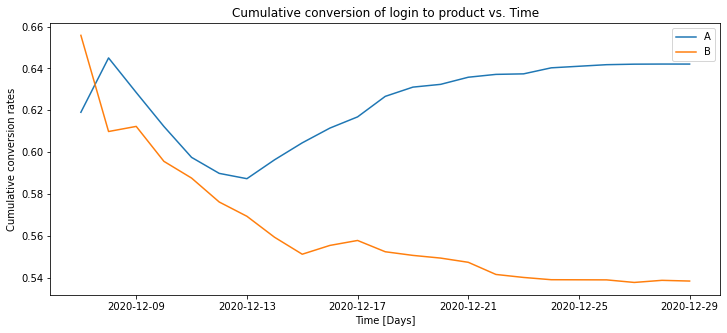

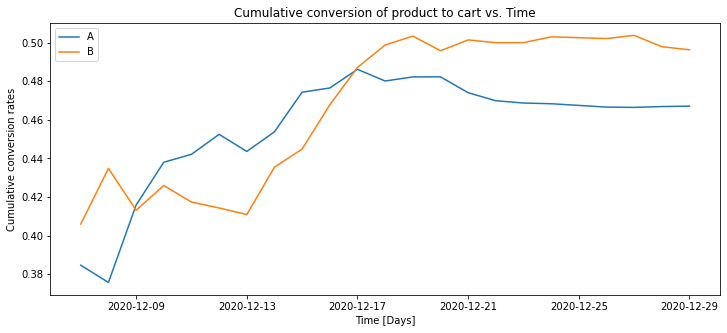

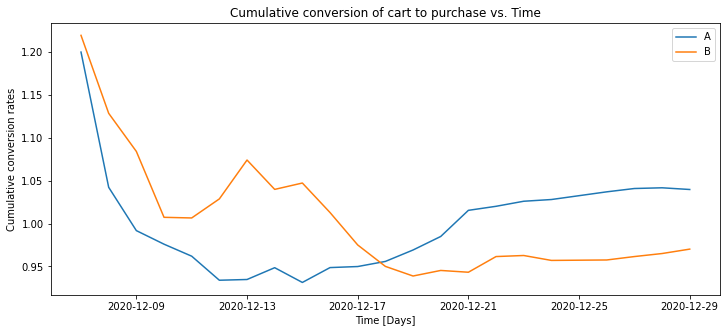

In [ ]:
# Studying conversion at different funnel stages
# Calculating the conversion per day
data_cumulative['conversion_of_login_to_product'] = data_cumulative['product_pages'] / data_cumulative['logins']
data_cumulative['conversion_of_product_to_cart'] = data_cumulative['product_carts'] / data_cumulative['product_pages']
data_cumulative['conversion_of_cart_to_purchase'] = data_cumulative['purchases'] / data_cumulative['product_carts']

# Selecting data for group A 
data_cumulative_A = data_cumulative.query('group == "A"')
# Selecting data for group B
data_cumulative_B = data_cumulative.query('group == "B"')

# Plotting
for conversion_type in ['conversion_of_login_to_product', 'conversion_of_product_to_cart', 'conversion_of_cart_to_purchase']:
    plt.figure(figsize=(12, 5))
    plt.plot(data_cumulative_A['date'], data_cumulative_A[conversion_type], label='A')
    plt.plot(data_cumulative_B['date'], data_cumulative_B[conversion_type], label='B')
    plt.title('Cumulative ' + conversion_type.replace("_", " ") + ' vs. Time')
    plt.ylabel('Cumulative conversion rates')
    plt.xlabel('Time [Days]')
    plt.legend()
    plt.show()

- By the end of the test, the conversion from loging in to entering a product page stabilizes, and the difference in conversion between both groups is about 10% in favor of group A.  
- By the end of the test, the conversion from viewing the product pages to entering the cart page stabilizes, and the difference in conversion between both groups is less than 5% in favor of group B.  
- The conversion from the cart page to purchases can obtain values that are greater than one. This is a result of the number of product cart events being smaller than the number of purchases, and originates from the possibility to purchase items without entering the cart.
- The conversions didn't raise by over 10% in group B relative to group A, so at the moment it seems that the new changes can be discarded.

## Events per user per group

Checking if the numbers of events per user are distributed equally in the samples.

The mean number of "purchase" events in group A and B are 2.86 and 2.44, with standard deviations of 1.13 and 1.18, respectively.



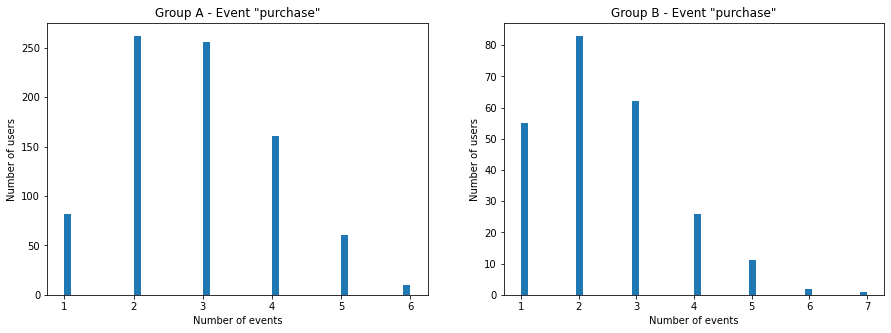


The mean number of "product_cart" events in group A and B are 2.93 and 2.51, with standard deviations of 1.14 and 1.14, respectively.



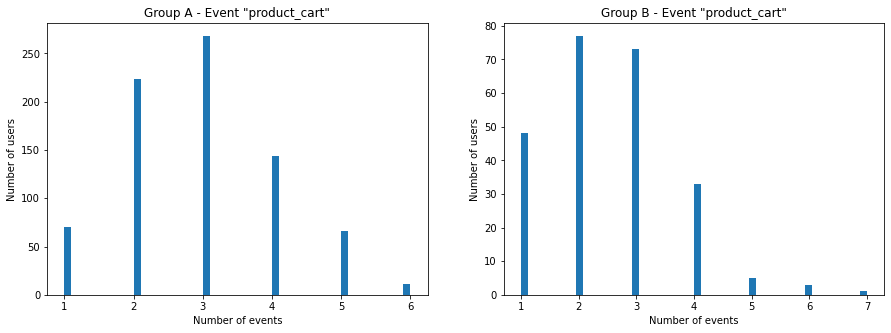


The mean number of "product_page" events in group A and B are 2.91 and 2.48, with standard deviations of 1.17 and 1.16, respectively.



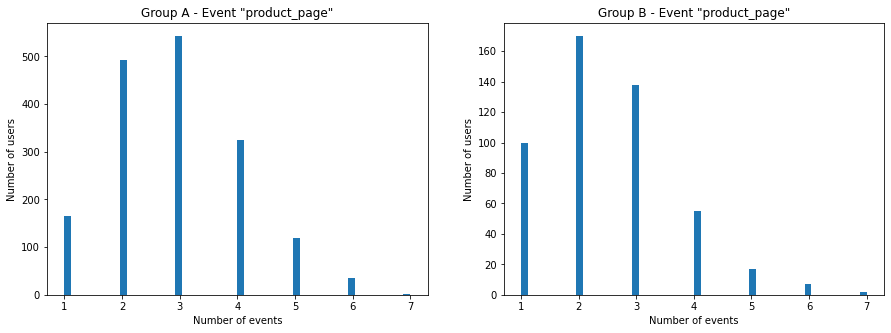


The mean number of "login" events in group A and B are 2.94 and 2.60, with standard deviations of 1.16 and 1.19, respectively.



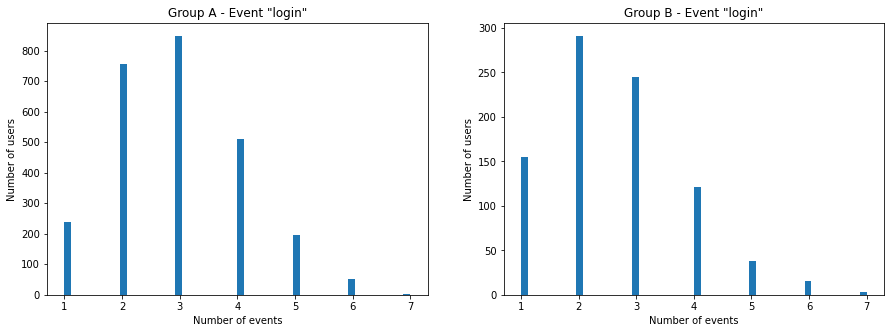

In [ ]:
# Checking if the numbers of events per user are distributed equally in the samples
for event in unique_events:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    events_per_user_group_A = data_ab_test.query('group == "A" and event_name == @event') \
                                          .groupby('user_id')['event_name'].count()
    events_per_user_group_B = data_ab_test.query('group == "B" and event_name == @event') \
                                          .groupby('user_id')['event_name'].count()

    # Presenting statistics
    print('The mean number of "{}" events in group A and B are {:.2f} and {:.2f}, with standard deviations of {:.2f} and {:.2f}, respectively.\n'
          .format(event, events_per_user_group_A.mean(), events_per_user_group_B.mean(),
                  events_per_user_group_A.std(), events_per_user_group_B.std()))

    # Plotting
    axes[0].hist(events_per_user_group_A, bins=50)
    axes[0].set_title(f'Group A - Event "{event}"')
    axes[0].set_ylabel('Number of users')
    axes[0].set_xlabel('Number of events')

    axes[1].hist(events_per_user_group_B, bins=50)
    axes[1].set_title(f'Group B - Event "{event}"')
    axes[1].set_ylabel('Number of users')
    axes[1].set_xlabel('Number of events')

    plt.show()
    print()

The mean number of events per user in both testing groups for all of the unique events are very close, but group A has consistently higher values than group B. The differences between the means don't go over approximately 0.5, and the standard deviations don't go over approximately 0.2. Comparing the pairs of the distributions for the two groups, we see that the general shapes are very similar, but in some cases the peaks appear in two adjacent bins.

## Users in both samples

Checking if there are users who enter both samples.

In [ ]:
# Finding the users who enter both test groups
intersection_users = [x for x in users_group_A if x in users_group_B]
# Another method is:
# intersection_users = list(set(users_group_A) & set(users_group_B))
print('The number of users that appear in both test groups is {}.'.format( len(intersection_users)))

The number of users that appear in both test groups is 0.


## Events by days

Checking how the number of events is distributed by days.

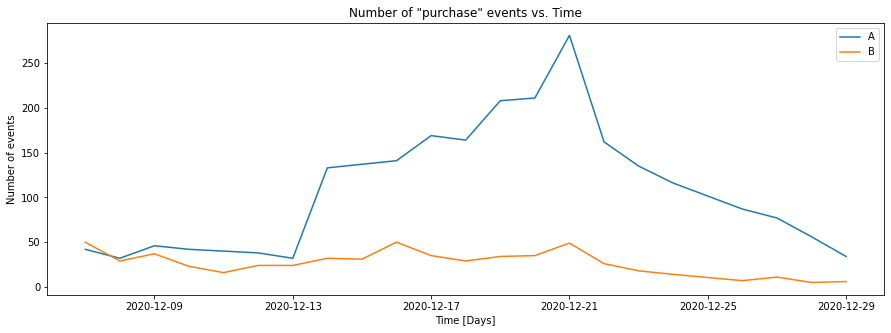

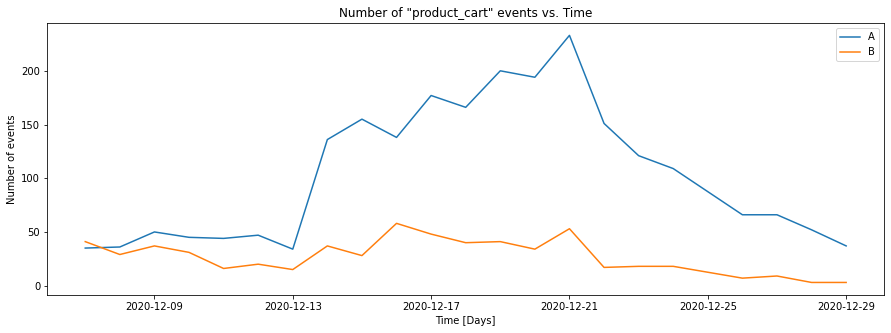

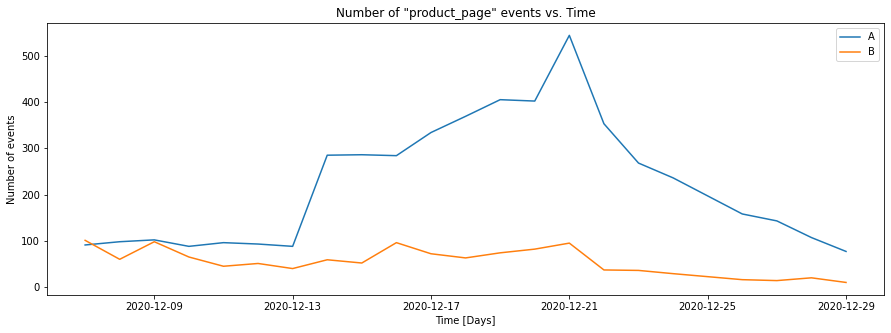

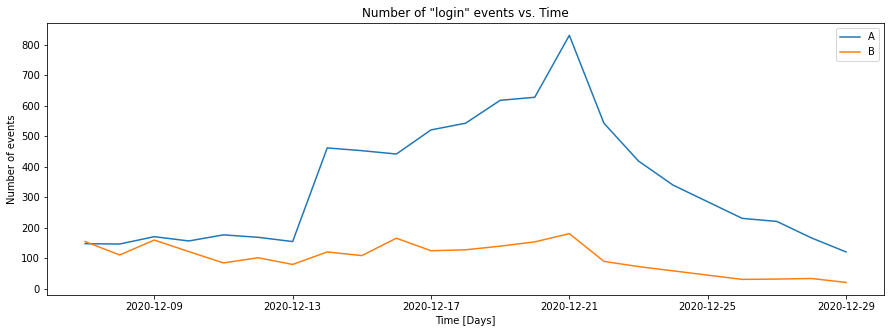

In [ ]:
# Checking how the number of events is distributed by days
for event in unique_events:
    # Preparing data for plotting
    data_for_plot_A = data_ab_test.query('event_name == @event and group == "A"') \
                                    .groupby('event_dt')['event_name'].count() \
                                    .to_frame().reset_index(drop=False)
    data_for_plot_A.columns = ['event_date','number_of_events']

    data_for_plot_B = data_ab_test.query('event_name == @event and group == "B"') \
                                    .groupby('event_dt')['event_name'].count() \
                                    .to_frame().reset_index(drop=False)
    data_for_plot_B.columns = ['event_date','number_of_events']

    # Plotting
    plt.figure(figsize=(15,5))
    plt.plot(data_for_plot_A['event_date'], data_for_plot_A['number_of_events'], label='A')
    plt.plot(data_for_plot_B['event_date'], data_for_plot_B['number_of_events'], label='B')
    plt.title(f'Number of "{event}" events vs. Time')
    plt.ylabel('Number of events')
    plt.xlabel('Time [Days]')
    plt.legend()
    plt.show()

- In group A there's a general rise in the number of events during the duration of the experiment, with two spikes around 2020-12-13 and 2020-12-21, and a drop towards the end of the experiment.
- In group B there are fluctuations in the number of events but no extreme rises are seen, and the number of events actually drops by the end of the experiment relative to the number at its beginning.
- It's important to notice that surges in activity can be attributed to special events, and in our case the "Christmas & New Year Promo" marketing event occured in the EU region during the experiment, between the 2020-12-25 and 2021-01-03, so it shouldn't have had an effect on the surges in the numbers of events. Therefore, we can attribute the spikes to outliers.

## A/B test considerations

Describing the possible details in the data that have to be taken into account before starting the A/B test.

In order to perform a correct A/B test, the following considerations should be taken into account.

Regarding the test procedure:
- There should be enough participants. The number of test participants was expected to be 6000, but it's almost twice smaller than that.
- The users must be separated between the groups and stay in their designated group for the entire duration of the experiment, which is indeed the case.
- The number of users in both test groups should be close to equal, but there is almost 3 times more users in group A than in group B.
- The users of both groups should use the same devices, and thus the same version of the online store, and in our case the percentages of users who signed up with each type of device are indeed very close.
- The dates of the events for each user should correspond to the time period in which we want to see if an effect has happened, which is 14 days in our case.

The intended identity of the participants must be correct:
- The users must belong to the correct experiment, which is named "recommender_system_test".
- The users should belong to the EU region.
- The users must have joined the experiment by 2020-12-21.

Factors that can distort the results should be considered:
- The users shouldn't participate in other tests during the experiment, since those may influence their decisions, which is a problem that occurs in our case.
- There shouldn't be special events during the duration of the experiment that might distort its results, and if there are, it should be noticed that surges in activity can be attributed to them. In our case, the "Christmas & New Year Promo" marketing event occured in the EU region during the experiment, between the 2020-12-25 and 2021-01-03.
- Outlier participants should be considered and removed.
- The experiment should be long enough for the results to stabilize, which happens in our case, and is especially important here since new users kept joining the experiment for a while.

# Evaluating A/B test results

## Removing outliers

In [ ]:
# Finding anomalous users with many events by calculating the 95th and 99th percentiles of the number of events
anomalous_users = pd.Series(data=None)
for event in unique_events:
    print('Finding the anomalous users for the "{}" event.\n'.format(event))
    events_per_user = data_ab_test.query('event_name == @event') \
                                    .groupby('user_id', as_index=False)['event_name'].count()
    events_per_user.columns = ['user_id', 'events']
    print('Presenting the "events_per_user" dataframe:\n', events_per_user.head(5), '\n')

    events_percentiles = np.percentile(events_per_user['events'], [95, 99])
    print('The 95th and 99th percentiles of the events per user are', events_percentiles)

    # Defining the point at which a data point becomes an anomaly
    anomalous_events_threshold = events_percentiles[1]
    print('The threshold for anomalous events is {} events.\n'.format(anomalous_events_threshold))

    # Saving the anomalous users
    anomalous_users_for_event = \
        events_per_user.query('events >= @anomalous_events_threshold')['user_id']
    print('The number of anomalous users for the "{}" event is {}.\n'
          .format(event, len(anomalous_users_for_event)))
    anomalous_users = pd.concat([anomalous_users, anomalous_users_for_event]) \
                               .drop_duplicates()

print('The total number of anomalous users is {}.\n'.format(len(anomalous_users)))
print('Presenting the "anomalous_users" series:\n', anomalous_users, '\n')

Finding the anomalous users for the "purchase" event.

Presenting the "events_per_user" dataframe:
             user_id  events
0  0010A1C096941592       4
1  005E096DBD379BCF       2
2  0082295A41A867B5       5
3  00C1F5175586DFCF       3
4  01157AAD4401952B       2 

The 95th and 99th percentiles of the events per user are [5. 6.]
The threshold for anomalous events is 6.0 events.

The number of anomalous users for the "purchase" event is 13.

Finding the anomalous users for the "product_cart" event.

Presenting the "events_per_user" dataframe:
             user_id  events
0  003DF44D7589BBD4       5
1  0082295A41A867B5       5
2  00E68F103C66C1F7       3
3  00EFA157F7B6E1C4       3
4  01553AABC481F26C       4 

The 95th and 99th percentiles of the events per user are [5. 6.]
The threshold for anomalous events is 6.0 events.

The number of anomalous users for the "product_cart" event is 15.

Finding the anomalous users for the "product_page" event.

Presenting the "events_per_user" da

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
# Filtering the data
data_ab_test_filtered = data_ab_test.query('user_id not in @anomalous_users')
print('The total number of users is {}.'.format(data_ab_test['user_id'].nunique()))
print('The number of anomalous users is {}.'.format(anomalous_users.shape[0]))
print('The total number of users in the filtered data is {}.'
      .format(data_ab_test_filtered['user_id'].nunique()))

The total number of users is 3471.
The number of anomalous users is 73.
The total number of users in the filtered data is 3398.


In [ ]:
# Preparing test data
data_z_test_filtered = \
    pd.pivot_table(data=data_ab_test.reset_index()[['group','event_name','index']],
                   index='group',
                   columns='event_name',
                   values='index', # Selected just so we'll have something to count
                   aggfunc='nunique') \
        .reset_index().rename_axis(None, axis=1)
print('Presenting the "data_z_test_filtered" dataframe:\n', data_z_test_filtered)

Presenting the "data_z_test_filtered" dataframe:
   group  login  product_cart  product_page  purchase
0     A   7642          2292          4907      2383
1     B   2257           603          1215       585


## Login -> product page

### Calculating variables

In [ ]:
# Setting the final event in the funnel, which we test the conversion from the "login" event into it
event = 'product_page'

# Defining the hypotheses to test
print('''The null hypothesis is that there is no statistically significant differece
between the proportions in the test groups of customers who experienced the
"{}" event after loging in - the conversions are equal.\n'''.format(event))
print('''The alternative hypothesis is that there is a statistically significant differece
between the proportions in the test groups of customers who experienced the
"{}" event after loging in - the conversions are not equal.\n'''.format(event))

# Setting the critical statistical significance level
alpha = 0.05
print('The critical statistical significance level is {}.\n'.format(alpha))

# Setting the number of trials and successes
trials = np.array([data_z_test_filtered.query('group == "A"')['login'], 
                   data_z_test_filtered.query('group == "B"')['login']]).flatten()
successes = np.array([data_z_test_filtered.query('group == "A"')[event], 
                      data_z_test_filtered.query('group == "B"')[event]]).flatten()
print('The numbers of trials for group A and B, respectively, are:\n',
      trials, '\nand the numbers of and successes are:\n', successes)

# Calculating success proportion in each of the two groups
p1 = successes[0]/trials[0]
p2 = successes[1]/trials[1]

# Calculating success proportion in the combined dataset
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# Calculating the difference between the datasets' proportions
difference = p1 - p2

The null hypothesis is that there is no statistically significant differece
between the proporitons in the test groups of customers who experienced the
"product_page" event after loging in - the conversions are equal.

The alternative hypothesis is that there is a statistically significant differece
between the proporitons in the test groups of customers who experienced the
"product_page" event after loging in - the conversions are not equal.

The critical statistical significance level is 0.05.

The numbers of trials for group A and B, respectively, are:
 [7642 2257] 
and the numbers of and successes are:
 [4907 1215]


### Testing hypothesis

In [ ]:
# Calculating the statistic in standard deviations of the standard normal distribution
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# Setting up the standard normal distribution (mean 0, standard deviation 1)
distr = st.norm(0, 1) 

# Calculating the p-value
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('The p-value is {:.10f}.\n'.format(p_value))

# Comparing the p-value to the critical statistical significance level
if (p_value < alpha):
    print("Rejecting the null hypothesis - there is a significant difference between the proportions.")
else:
    print("Failed to reject the null hypothesis - there is no reason to consider the proportions different.")

The p-value is 0.0000000000.

Rejecting the null hypothesis - there is a significant difference between the proportions.


## Login -> product cart

### Calculating variables

In [ ]:
# Setting the final event in the funnel, which we test the conversion from the "login" event into it
event = 'product_cart'

# Defining the hypotheses to test
print('''The null hypothesis is that there is no statistically significant differece
between the proportions in the test groups of customers who experienced the
"{}" event after loging in - the conversions are equal.\n'''.format(event))
print('''The alternative hypothesis is that there is a statistically significant differece
between the proportions in the test groups of customers who experienced the
"{}" event after loging in - the conversions are not equal.\n'''.format(event))

# Setting the critical statistical significance level
alpha = 0.05
print('The critical statistical significance level is {}.\n'.format(alpha))

# Setting the number of trials and successes
trials = np.array([data_z_test_filtered.query('group == "A"')['login'], 
                   data_z_test_filtered.query('group == "B"')['login']]).flatten()
successes = np.array([data_z_test_filtered.query('group == "A"')[event], 
                      data_z_test_filtered.query('group == "B"')[event]]).flatten()
print('The numbers of trials for group A and B, respectively, are:\n',
      trials, '\nand the numbers of and successes are:\n', successes)

# Calculating success proportion in each of the two groups
p1 = successes[0]/trials[0]
p2 = successes[1]/trials[1]

# Calculating success proportion in the combined dataset
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# Calculating the difference between the datasets' proportions
difference = p1 - p2

The null hypothesis is that there is no statistically significant differece
between the proporitons in the test groups of customers who experienced the
"product_cart" event after loging in - the conversions are equal.

The alternative hypothesis is that there is a statistically significant differece
between the proporitons in the test groups of customers who experienced the
"product_cart" event after loging in - the conversions are not equal.

The critical statistical significance level is 0.05.

The numbers of trials for group A and B, respectively, are:
 [7642 2257] 
and the numbers of and successes are:
 [2292  603]


### Testing hypothesis

In [ ]:
# Calculating the statistic in standard deviations of the standard normal distribution
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# Setting up the standard normal distribution (mean 0, standard deviation 1)
distr = st.norm(0, 1) 

# Calculating the p-value
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('The p-value is {:.10f}.\n'.format(p_value))

# Comparing the p-value to the critical statistical significance level
if (p_value < alpha):
    print("Rejecting the null hypothesis - there is a significant difference between the proportions.")
else:
    print("Failed to reject the null hypothesis - there is no reason to consider the proportions different.")

The p-value is 0.0026515851.

Rejecting the null hypothesis - there is a significant difference between the proportions.


## Login -> purchase

### Calculating variables

In [ ]:
# Setting the final event in the funnel, which we test the conversion from the "login" event into it
event = 'purchase'

# Defining the hypotheses to test
print('''The null hypothesis is that there is no statistically significant differece
between the proportions in the test groups of customers who experienced the
"{}" event after loging in - the conversions are equal.\n'''.format(event))
print('''The alternative hypothesis is that there is a statistically significant differece
between the proportions in the test groups of customers who experienced the
"{}" event after loging in - the conversions are not equal.\n'''.format(event))

# Setting the critical statistical significance level
alpha = 0.05
print('The critical statistical significance level is {}.\n'.format(alpha))

# Setting the number of trials and successes
trials = np.array([data_z_test_filtered.query('group == "A"')['login'], 
                   data_z_test_filtered.query('group == "B"')['login']]).flatten()
successes = np.array([data_z_test_filtered.query('group == "A"')[event], 
                      data_z_test_filtered.query('group == "B"')[event]]).flatten()
print('The numbers of trials for group A and B, respectively, are:\n',
      trials, '\nand the numbers of and successes are:\n', successes)

# Calculating success proportion in each of the two groups
p1 = successes[0]/trials[0]
p2 = successes[1]/trials[1]

# Calculating success proportion in the combined dataset
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# Calculating the difference between the datasets' proportions
difference = p1 - p2

The null hypothesis is that there is no statistically significant differece
between the proporitons in the test groups of customers who experienced the
"purchase" event after loging in - the conversions are equal.

The alternative hypothesis is that there is a statistically significant differece
between the proporitons in the test groups of customers who experienced the
"purchase" event after loging in - the conversions are not equal.

The critical statistical significance level is 0.05.

The numbers of trials for group A and B, respectively, are:
 [7642 2257] 
and the numbers of and successes are:
 [2383  585]


### Testing hypothesis

In [ ]:
# Calculating the statistic in standard deviations of the standard normal distribution
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# Setting up the standard normal distribution (mean 0, standard deviation 1)
distr = st.norm(0, 1) 

# Calculating the p-value
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('The p-value is {:.10f}.\n'.format(p_value))

# Comparing the p-value to the critical statistical significance level
if (p_value < alpha):
    print("Rejecting the null hypothesis - there is a significant difference between the proportions.")
else:
    print("Failed to reject the null hypothesis - there is no reason to consider the proportions different.")

The p-value is 0.0000016243.

Rejecting the null hypothesis - there is a significant difference between the proportions.


## Conclusions

- The null hypothesis is that there isn't a statistically significant difference in conversions between groups A and B - the conversions are equal.

- The alternative hypothesis is that there is a statistically significant difference in conversions between groups A and B - the conversions are not equal.

- When testing the conversion from the "login" event to each of the other events, we always obtained a p-value that is smaller than 0.05, so we should reject the null hypothesis and conclude that there is a statistically significant difference between groups A and B.

- The mean conversion for group A was higher than for group B.

- The new changes to the online store shouldn't be added.

In [ ]:
# set the function:
def z_test_function(successes_A, successes_B, trials_A, trials_B, event, alpha):
    # Calculating success proportion in each of the two groups
    p1 = successes_A/trials_A
    p2 = successes_B/trials_B

    # Calculating success proportion in the combined dataset
    p_combined = (successes_A + successes_B) / (trials_A + trials_B)

    # Calculating the difference between the datasets' proportions
    difference = p1 - p2

    # Calculating the statistic in standard deviations of the standard normal distribution
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials_A + 1/trials_B))

    # Setting up the standard normal distribution (mean 0, standard deviation 1)
    distr = st.norm(0, 1) 

    # Calculating the p-value
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('The conversion from login into {} for group A = {:.2%}'.format(event, p1))
    print('The conversion from login into {} for group B = {:.2%}'.format(event, p2))
    print('The alpha value is {:.3f}.'.format(alpha))    
    print('The p-value is {:.10f}.'.format(p_value))

    # Comparing the p-value to the critical statistical significance level
    if (p_value < alpha):
        print("Rejecting the null hypothesis - there is a significant difference between the proportions.")
    else:
        print("Failed to reject the null hypothesis - there is no reason to consider the proportions different.")
    print()

In [ ]:
# Preparing test data
data_z_test_filtered = \
    pd.pivot_table(data=data_ab_test.reset_index()[['group','event_name','user_id']],
                   index='group',
                   columns='event_name',
                   values='user_id',
                   aggfunc='nunique') \
        .reset_index().rename_axis(None, axis=1)

for event in ('product_page','product_cart','purchase'):
    successes_A = data_z_test_filtered[event][0]
    successes_B = data_z_test_filtered[event][1]
    trials_A = data_z_test_filtered['login'][0]
    trials_B = data_z_test_filtered['login'][1]
    alpha = 0.05 / 3
    
    z_test_function(successes_A, successes_B, trials_A, trials_B, event, alpha)

The conversion from login into product_page for group A = 64.69%
The conversion from login into product_page for group B = 56.34%
The alpha value is 0.017.
The p-value is 0.0000104687.
Rejecting the null hypothesis - there is a significant difference between the proportions.

The conversion from login into product_cart for group A = 30.04%
The conversion from login into product_cart for group B = 27.65%
The alpha value is 0.017.
The p-value is 0.1804965553.
Failed to reject the null hypothesis - there is no reason to consider the proportions different.

The conversion from login into purchase for group A = 31.96%
The conversion from login into purchase for group B = 27.65%
The alpha value is 0.017.
The p-value is 0.0172228297.
Failed to reject the null hypothesis - there is no reason to consider the proportions different.



# Overall conclusions

Conclusions from the exploratory data analysis stage:

- The following test conditions could be improved: The users shouldn't participate in other tests during the experiment, the number of users was lower than expected, the numbers of participants in both groups weren't similar, and there were marketing events during the duration of the experiment.

- Comparing the conversions of both testing groups, they didn't raise by over 10% in group B relative to group A, and the conversions of group A to each stage are actually higher than group B's, which suggests that the new changes can be discarded.

- The mean number of events per user in both testing groups for all of the unique events are very close, and the distributions are quite similar, but group A has consistently higher values than group B. 

- The number of users that appear in both test groups is 0.

- Looking at the events by days, in group A there's a general rise in the number of events during the duration of the experiment, with two spikes around 2020-12-13 and 2020-12-21, and a drop towards the end of the experiment.
In group B there are fluctuations in the number of events but no extreme rises are seen, and the number of events actually drops by the end of the experiment relative to the number at its beginning.

Conclusions from the evaluation of the A/B test results:

- The null hypothesis is that there isn't a statistically significant difference in conversions between groups A and B - the conversions are equal.

- When testing the conversion from the "login" event to each of the other events, we always obtained a p-value that is smaller than 0.05, so we should reject the null hypothesis and conclude that there is a statistically significant difference between groups A and B.

- The mean conversion for group A was higher than for group B.

- The new changes to the online store shouldn't be added.